In [1]:
#imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model



In [2]:
#OBTER OS DADOS
raw_data = pd.read_csv('breast-cancer-wisconsin.data',header=0,na_values=['?'])

#REMOVER LINHAS COM VALORES INVÁLIDOS
raw_data=raw_data.dropna()
#raw_input_data.fillna(0,inplace = True)
#print(raw_input_data.head(25))

#DIVIDIR DADOS ENTRE ENTRADA E SAÍDA
raw_input_data = raw_data.iloc[:,1:9]
raw_output_data = raw_data.iloc[:,10]

#TROCA SAIDAS 2 E 4 POR 0 E 1
raw_output_data.replace([2, 4], [0, 1],inplace = True)
# 0 = benigno
# 1 = maligno


In [3]:
#FUNÇÕES DE VISUALIZAÇÃO
def plot_acc(data):
    plt.plot(data.history['acc'])
    plt.plot(data.history['val_acc'])
    plt.title('Precisão do Modelo')
    plt.ylabel('Precisão')
    plt.xlabel('Época')
    plt.legend(['Treinamento', 'Validação'], loc='upper left')
    plt.show()
    
def plot_loss(data):
    plt.plot(data.history['loss'])
    plt.plot(data.history['val_loss'])
    plt.title('Erro Médio Quadrático')
    plt.ylabel('Custo')
    plt.xlabel('Época')
    plt.legend(['Treinamento', 'Validação'], loc='upper left')
    plt.show()
    


In [4]:
PCT_EVAL = 0.2
PCT_TEST = 0.5

In [5]:
#DIVIDE E NORMALIZA OS DADOS

x_train, x_validate, y_train, y_validate = train_test_split(raw_input_data,raw_output_data, test_size=PCT_EVAL, shuffle= True)


#transforma os datasets em arrays
x_train = np.array(x_train.values)
y_train = np.array(y_train.values)

x_validate = np.array(x_validate.values)
y_validate = np.array(y_validate.values)

#normaliza os dados (dados já estao normalizados, entao acho que nao é necessario)
#x_train = tf.keras.utils.normalize(x_train,axis=1)
#x_test= tf.keras.utils.normalize(x_test,axis=1)


In [6]:
model = tf.keras.models.Sequential()

#CAMADA DE ENTRADA (9 ENTRADAS), FUNÇÃO DE ATIVAÇÃO SIGMOID
model.add(tf.keras.layers.Dense(9,kernel_initializer='random_uniform',
                bias_initializer='zeros', activation=tf.nn.sigmoid))

#CAMADA OCULTA #1  (9 NEURONIOS), FUNÇAO DE ATIVAÇÃO SIGMOID
model.add(tf.keras.layers.Dense(5,kernel_initializer='random_uniform',
                bias_initializer='zeros', activation=tf.nn.sigmoid))

#CAMADA DE SAÍDA (1 NEURONIO), FUNÇAO DE ATIVAÇÃO sigmoid
model.add(tf.keras.layers.Dense(1,activation=tf.nn.sigmoid))

W0626 16:54:48.832576 139872193910592 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0626 16:54:48.836295 139872193910592 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.compile(optimizer='adam',loss='mean_squared_error', metrics = ['accuracy'])

In [8]:
history = model.fit(x_train,y_train, validation_split=PCT_TEST, verbose = 1, epochs=1000)

Train on 273 samples, validate on 273 samples
Epoch 1/1000
273/273 [==============================] - 0s 415us/sample - loss: 0.3014 - acc: 0.3810 - val_loss: 0.3190 - val_acc: 0.2967
Epoch 2/1000
273/273 [==============================] - 0s 67us/sample - loss: 0.2934 - acc: 0.3810 - val_loss: 0.3088 - val_acc: 0.2967
Epoch 3/1000
273/273 [==============================] - 0s 64us/sample - loss: 0.2863 - acc: 0.3810 - val_loss: 0.2991 - val_acc: 0.2967
Epoch 4/1000
273/273 [==============================] - 0s 78us/sample - loss: 0.2792 - acc: 0.3810 - val_loss: 0.2901 - val_acc: 0.2967
Epoch 5/1000
273/273 [==============================] - 0s 70us/sample - loss: 0.2730 - acc: 0.3810 - val_loss: 0.2816 - val_acc: 0.2967
Epoch 6/1000
273/273 [==============================] - 0s 81us/sample - loss: 0.2665 - acc: 0.3810 - val_loss: 0.2737 - val_acc: 0.2967
Epoch 7/1000
273/273 [==============================] - 0s 67us/sample - loss: 0.2603 - acc: 0.3810 - val_loss: 0.2661 - val_acc: 0

273/273 [==============================] - 0s 54us/sample - loss: 0.1182 - acc: 0.9560 - val_loss: 0.1150 - val_acc: 0.9451
Epoch 61/1000
273/273 [==============================] - 0s 56us/sample - loss: 0.1162 - acc: 0.9560 - val_loss: 0.1135 - val_acc: 0.9451
Epoch 62/1000
273/273 [==============================] - 0s 59us/sample - loss: 0.1145 - acc: 0.9634 - val_loss: 0.1120 - val_acc: 0.9451
Epoch 63/1000
273/273 [==============================] - 0s 66us/sample - loss: 0.1127 - acc: 0.9634 - val_loss: 0.1105 - val_acc: 0.9451
Epoch 64/1000
273/273 [==============================] - 0s 74us/sample - loss: 0.1110 - acc: 0.9634 - val_loss: 0.1090 - val_acc: 0.9451
Epoch 65/1000
273/273 [==============================] - 0s 55us/sample - loss: 0.1093 - acc: 0.9634 - val_loss: 0.1075 - val_acc: 0.9451
Epoch 66/1000
273/273 [==============================] - 0s 63us/sample - loss: 0.1076 - acc: 0.9634 - val_loss: 0.1061 - val_acc: 0.9487
Epoch 67/1000
273/273 [=========================

273/273 [==============================] - 0s 60us/sample - loss: 0.0537 - acc: 0.9670 - val_loss: 0.0588 - val_acc: 0.9597
Epoch 120/1000
273/273 [==============================] - 0s 60us/sample - loss: 0.0532 - acc: 0.9670 - val_loss: 0.0582 - val_acc: 0.9597
Epoch 121/1000
273/273 [==============================] - 0s 71us/sample - loss: 0.0527 - acc: 0.9670 - val_loss: 0.0578 - val_acc: 0.9597
Epoch 122/1000
273/273 [==============================] - 0s 72us/sample - loss: 0.0522 - acc: 0.9670 - val_loss: 0.0573 - val_acc: 0.9597
Epoch 123/1000
273/273 [==============================] - 0s 68us/sample - loss: 0.0516 - acc: 0.9670 - val_loss: 0.0568 - val_acc: 0.9597
Epoch 124/1000
273/273 [==============================] - 0s 66us/sample - loss: 0.0511 - acc: 0.9670 - val_loss: 0.0563 - val_acc: 0.9597
Epoch 125/1000
273/273 [==============================] - 0s 64us/sample - loss: 0.0506 - acc: 0.9670 - val_loss: 0.0559 - val_acc: 0.9597
Epoch 126/1000
273/273 [==================

273/273 [==============================] - 0s 59us/sample - loss: 0.0344 - acc: 0.9670 - val_loss: 0.0410 - val_acc: 0.9670
Epoch 179/1000
273/273 [==============================] - 0s 58us/sample - loss: 0.0342 - acc: 0.9670 - val_loss: 0.0408 - val_acc: 0.9670
Epoch 180/1000
273/273 [==============================] - 0s 58us/sample - loss: 0.0340 - acc: 0.9670 - val_loss: 0.0407 - val_acc: 0.9634
Epoch 181/1000
273/273 [==============================] - 0s 64us/sample - loss: 0.0338 - acc: 0.9670 - val_loss: 0.0405 - val_acc: 0.9670
Epoch 182/1000
273/273 [==============================] - 0s 70us/sample - loss: 0.0336 - acc: 0.9670 - val_loss: 0.0404 - val_acc: 0.9670
Epoch 183/1000
273/273 [==============================] - 0s 67us/sample - loss: 0.0334 - acc: 0.9670 - val_loss: 0.0402 - val_acc: 0.9670
Epoch 184/1000
273/273 [==============================] - 0s 71us/sample - loss: 0.0332 - acc: 0.9670 - val_loss: 0.0401 - val_acc: 0.9634
Epoch 185/1000
273/273 [==================

273/273 [==============================] - 0s 59us/sample - loss: 0.0265 - acc: 0.9670 - val_loss: 0.0345 - val_acc: 0.9634
Epoch 238/1000
273/273 [==============================] - 0s 62us/sample - loss: 0.0265 - acc: 0.9670 - val_loss: 0.0345 - val_acc: 0.9634
Epoch 239/1000
273/273 [==============================] - 0s 64us/sample - loss: 0.0263 - acc: 0.9670 - val_loss: 0.0344 - val_acc: 0.9634
Epoch 240/1000
273/273 [==============================] - 0s 68us/sample - loss: 0.0262 - acc: 0.9670 - val_loss: 0.0343 - val_acc: 0.9634
Epoch 241/1000
273/273 [==============================] - 0s 71us/sample - loss: 0.0262 - acc: 0.9670 - val_loss: 0.0343 - val_acc: 0.9634
Epoch 242/1000
273/273 [==============================] - 0s 69us/sample - loss: 0.0261 - acc: 0.9670 - val_loss: 0.0341 - val_acc: 0.9634
Epoch 243/1000
273/273 [==============================] - 0s 70us/sample - loss: 0.0260 - acc: 0.9670 - val_loss: 0.0340 - val_acc: 0.9634
Epoch 244/1000
273/273 [==================

273/273 [==============================] - 0s 72us/sample - loss: 0.0225 - acc: 0.9744 - val_loss: 0.0310 - val_acc: 0.9670
Epoch 297/1000
273/273 [==============================] - 0s 70us/sample - loss: 0.0225 - acc: 0.9744 - val_loss: 0.0310 - val_acc: 0.9670
Epoch 298/1000
273/273 [==============================] - 0s 59us/sample - loss: 0.0224 - acc: 0.9744 - val_loss: 0.0310 - val_acc: 0.9670
Epoch 299/1000
273/273 [==============================] - 0s 65us/sample - loss: 0.0224 - acc: 0.9744 - val_loss: 0.0309 - val_acc: 0.9670
Epoch 300/1000
273/273 [==============================] - 0s 70us/sample - loss: 0.0223 - acc: 0.9744 - val_loss: 0.0309 - val_acc: 0.9670
Epoch 301/1000
273/273 [==============================] - 0s 79us/sample - loss: 0.0223 - acc: 0.9744 - val_loss: 0.0308 - val_acc: 0.9670
Epoch 302/1000
273/273 [==============================] - 0s 62us/sample - loss: 0.0222 - acc: 0.9744 - val_loss: 0.0307 - val_acc: 0.9670
Epoch 303/1000
273/273 [==================

273/273 [==============================] - 0s 66us/sample - loss: 0.0203 - acc: 0.9780 - val_loss: 0.0293 - val_acc: 0.9670
Epoch 356/1000
273/273 [==============================] - 0s 60us/sample - loss: 0.0203 - acc: 0.9780 - val_loss: 0.0293 - val_acc: 0.9670
Epoch 357/1000
273/273 [==============================] - 0s 66us/sample - loss: 0.0202 - acc: 0.9780 - val_loss: 0.0292 - val_acc: 0.9670
Epoch 358/1000
273/273 [==============================] - 0s 61us/sample - loss: 0.0203 - acc: 0.9780 - val_loss: 0.0293 - val_acc: 0.9670
Epoch 359/1000
273/273 [==============================] - 0s 71us/sample - loss: 0.0202 - acc: 0.9780 - val_loss: 0.0290 - val_acc: 0.9670
Epoch 360/1000
273/273 [==============================] - 0s 75us/sample - loss: 0.0202 - acc: 0.9780 - val_loss: 0.0290 - val_acc: 0.9670
Epoch 361/1000
273/273 [==============================] - 0s 79us/sample - loss: 0.0202 - acc: 0.9780 - val_loss: 0.0290 - val_acc: 0.9670
Epoch 362/1000
273/273 [==================

273/273 [==============================] - 0s 62us/sample - loss: 0.0188 - acc: 0.9780 - val_loss: 0.0282 - val_acc: 0.9634
Epoch 415/1000
273/273 [==============================] - 0s 67us/sample - loss: 0.0188 - acc: 0.9780 - val_loss: 0.0280 - val_acc: 0.9670
Epoch 416/1000
273/273 [==============================] - 0s 62us/sample - loss: 0.0187 - acc: 0.9780 - val_loss: 0.0281 - val_acc: 0.9634
Epoch 417/1000
273/273 [==============================] - 0s 63us/sample - loss: 0.0187 - acc: 0.9780 - val_loss: 0.0281 - val_acc: 0.9634
Epoch 418/1000
273/273 [==============================] - 0s 63us/sample - loss: 0.0187 - acc: 0.9780 - val_loss: 0.0280 - val_acc: 0.9670
Epoch 419/1000
273/273 [==============================] - 0s 61us/sample - loss: 0.0186 - acc: 0.9780 - val_loss: 0.0280 - val_acc: 0.9670
Epoch 420/1000
273/273 [==============================] - 0s 67us/sample - loss: 0.0186 - acc: 0.9780 - val_loss: 0.0280 - val_acc: 0.9670
Epoch 421/1000
273/273 [==================

273/273 [==============================] - 0s 58us/sample - loss: 0.0175 - acc: 0.9780 - val_loss: 0.0271 - val_acc: 0.9670
Epoch 474/1000
273/273 [==============================] - 0s 61us/sample - loss: 0.0175 - acc: 0.9780 - val_loss: 0.0270 - val_acc: 0.9670
Epoch 475/1000
273/273 [==============================] - 0s 54us/sample - loss: 0.0174 - acc: 0.9780 - val_loss: 0.0272 - val_acc: 0.9670
Epoch 476/1000
273/273 [==============================] - 0s 67us/sample - loss: 0.0174 - acc: 0.9780 - val_loss: 0.0272 - val_acc: 0.9670
Epoch 477/1000
273/273 [==============================] - 0s 67us/sample - loss: 0.0174 - acc: 0.9780 - val_loss: 0.0273 - val_acc: 0.9670
Epoch 478/1000
273/273 [==============================] - 0s 63us/sample - loss: 0.0173 - acc: 0.9780 - val_loss: 0.0271 - val_acc: 0.9670
Epoch 479/1000
273/273 [==============================] - 0s 62us/sample - loss: 0.0173 - acc: 0.9780 - val_loss: 0.0272 - val_acc: 0.9670
Epoch 480/1000
273/273 [==================

273/273 [==============================] - 0s 54us/sample - loss: 0.0163 - acc: 0.9817 - val_loss: 0.0263 - val_acc: 0.9707
Epoch 533/1000
273/273 [==============================] - 0s 60us/sample - loss: 0.0165 - acc: 0.9817 - val_loss: 0.0264 - val_acc: 0.9744
Epoch 534/1000
273/273 [==============================] - 0s 65us/sample - loss: 0.0162 - acc: 0.9853 - val_loss: 0.0264 - val_acc: 0.9707
Epoch 535/1000
273/273 [==============================] - 0s 65us/sample - loss: 0.0162 - acc: 0.9817 - val_loss: 0.0263 - val_acc: 0.9707
Epoch 536/1000
273/273 [==============================] - 0s 63us/sample - loss: 0.0162 - acc: 0.9817 - val_loss: 0.0263 - val_acc: 0.9707
Epoch 537/1000
273/273 [==============================] - 0s 68us/sample - loss: 0.0161 - acc: 0.9817 - val_loss: 0.0262 - val_acc: 0.9707
Epoch 538/1000
273/273 [==============================] - 0s 69us/sample - loss: 0.0162 - acc: 0.9817 - val_loss: 0.0261 - val_acc: 0.9707
Epoch 539/1000
273/273 [==================

273/273 [==============================] - 0s 57us/sample - loss: 0.0151 - acc: 0.9853 - val_loss: 0.0258 - val_acc: 0.9744
Epoch 592/1000
273/273 [==============================] - 0s 54us/sample - loss: 0.0151 - acc: 0.9853 - val_loss: 0.0258 - val_acc: 0.9744
Epoch 593/1000
273/273 [==============================] - 0s 61us/sample - loss: 0.0152 - acc: 0.9853 - val_loss: 0.0257 - val_acc: 0.9744
Epoch 594/1000
273/273 [==============================] - 0s 64us/sample - loss: 0.0151 - acc: 0.9853 - val_loss: 0.0257 - val_acc: 0.9744
Epoch 595/1000
273/273 [==============================] - 0s 64us/sample - loss: 0.0150 - acc: 0.9853 - val_loss: 0.0258 - val_acc: 0.9744
Epoch 596/1000
273/273 [==============================] - 0s 58us/sample - loss: 0.0150 - acc: 0.9853 - val_loss: 0.0258 - val_acc: 0.9744
Epoch 597/1000
273/273 [==============================] - 0s 65us/sample - loss: 0.0150 - acc: 0.9853 - val_loss: 0.0258 - val_acc: 0.9744
Epoch 598/1000
273/273 [==================

273/273 [==============================] - 0s 63us/sample - loss: 0.0142 - acc: 0.9853 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 651/1000
273/273 [==============================] - 0s 61us/sample - loss: 0.0142 - acc: 0.9853 - val_loss: 0.0256 - val_acc: 0.9707
Epoch 652/1000
273/273 [==============================] - 0s 60us/sample - loss: 0.0141 - acc: 0.9853 - val_loss: 0.0256 - val_acc: 0.9744
Epoch 653/1000
273/273 [==============================] - 0s 61us/sample - loss: 0.0141 - acc: 0.9853 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 654/1000
273/273 [==============================] - 0s 71us/sample - loss: 0.0141 - acc: 0.9853 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 655/1000
273/273 [==============================] - 0s 80us/sample - loss: 0.0141 - acc: 0.9853 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 656/1000
273/273 [==============================] - 0s 75us/sample - loss: 0.0141 - acc: 0.9853 - val_loss: 0.0256 - val_acc: 0.9707
Epoch 657/1000
273/273 [==================

273/273 [==============================] - 0s 62us/sample - loss: 0.0133 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 710/1000
273/273 [==============================] - 0s 63us/sample - loss: 0.0133 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 711/1000
273/273 [==============================] - 0s 51us/sample - loss: 0.0134 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 712/1000
273/273 [==============================] - 0s 61us/sample - loss: 0.0133 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 713/1000
273/273 [==============================] - 0s 67us/sample - loss: 0.0133 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 714/1000
273/273 [==============================] - 0s 67us/sample - loss: 0.0133 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 715/1000
273/273 [==============================] - 0s 68us/sample - loss: 0.0133 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 716/1000
273/273 [==================

273/273 [==============================] - 0s 61us/sample - loss: 0.0126 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 769/1000
273/273 [==============================] - 0s 60us/sample - loss: 0.0126 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 770/1000
273/273 [==============================] - 0s 67us/sample - loss: 0.0126 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 771/1000
273/273 [==============================] - 0s 71us/sample - loss: 0.0126 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 772/1000
273/273 [==============================] - 0s 59us/sample - loss: 0.0126 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 773/1000
273/273 [==============================] - 0s 75us/sample - loss: 0.0127 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 774/1000
273/273 [==============================] - 0s 64us/sample - loss: 0.0126 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 775/1000
273/273 [==================

Epoch 827/1000
273/273 [==============================] - 0s 58us/sample - loss: 0.0120 - acc: 0.9890 - val_loss: 0.0256 - val_acc: 0.9707
Epoch 828/1000
273/273 [==============================] - 0s 60us/sample - loss: 0.0120 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 829/1000
273/273 [==============================] - 0s 61us/sample - loss: 0.0120 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 830/1000
273/273 [==============================] - 0s 63us/sample - loss: 0.0120 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 831/1000
273/273 [==============================] - 0s 67us/sample - loss: 0.0120 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 832/1000
273/273 [==============================] - 0s 69us/sample - loss: 0.0120 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 833/1000
273/273 [==============================] - 0s 65us/sample - loss: 0.0120 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 834/1000
273/273 [===

Epoch 886/1000
273/273 [==============================] - 0s 92us/sample - loss: 0.0113 - acc: 0.9890 - val_loss: 0.0258 - val_acc: 0.9707
Epoch 887/1000
273/273 [==============================] - 0s 99us/sample - loss: 0.0113 - acc: 0.9890 - val_loss: 0.0258 - val_acc: 0.9707
Epoch 888/1000
273/273 [==============================] - 0s 82us/sample - loss: 0.0113 - acc: 0.9890 - val_loss: 0.0258 - val_acc: 0.9707
Epoch 889/1000
273/273 [==============================] - 0s 80us/sample - loss: 0.0112 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 890/1000
273/273 [==============================] - 0s 81us/sample - loss: 0.0112 - acc: 0.9890 - val_loss: 0.0257 - val_acc: 0.9707
Epoch 891/1000
273/273 [==============================] - 0s 87us/sample - loss: 0.0112 - acc: 0.9890 - val_loss: 0.0258 - val_acc: 0.9707
Epoch 892/1000
273/273 [==============================] - 0s 61us/sample - loss: 0.0112 - acc: 0.9890 - val_loss: 0.0258 - val_acc: 0.9707
Epoch 893/1000
273/273 [===

Epoch 945/1000
273/273 [==============================] - 0s 57us/sample - loss: 0.0100 - acc: 0.9890 - val_loss: 0.0269 - val_acc: 0.9670
Epoch 946/1000
273/273 [==============================] - 0s 74us/sample - loss: 0.0100 - acc: 0.9890 - val_loss: 0.0268 - val_acc: 0.9670
Epoch 947/1000
273/273 [==============================] - 0s 62us/sample - loss: 0.0100 - acc: 0.9890 - val_loss: 0.0269 - val_acc: 0.9670
Epoch 948/1000
273/273 [==============================] - 0s 74us/sample - loss: 0.0100 - acc: 0.9890 - val_loss: 0.0270 - val_acc: 0.9670
Epoch 949/1000
273/273 [==============================] - 0s 73us/sample - loss: 0.0100 - acc: 0.9890 - val_loss: 0.0270 - val_acc: 0.9670
Epoch 950/1000
273/273 [==============================] - 0s 69us/sample - loss: 0.0100 - acc: 0.9890 - val_loss: 0.0271 - val_acc: 0.9670
Epoch 951/1000
273/273 [==============================] - 0s 68us/sample - loss: 0.0099 - acc: 0.9890 - val_loss: 0.0270 - val_acc: 0.9670
Epoch 952/1000
273/273 [===

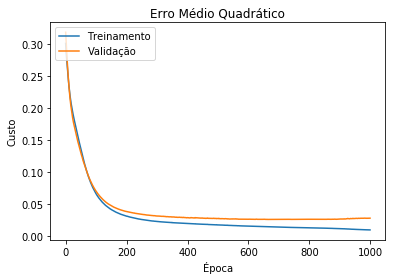

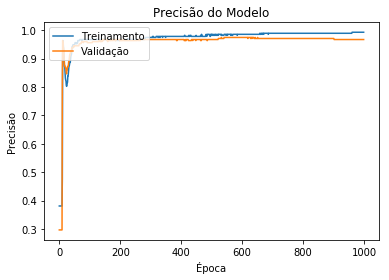

In [9]:
plot_loss(history)
plot_acc(history)
#plot_model(model, to_file='asdf.png',show_shapes=True,show_layer_names=True)

In [18]:
custo_val, acc_val = model.evaluate(x_validate, y_validate)
predictions = model.predict([x_validate])
predictions = (predictions > 0.5).astype(np.int)
print(confusion_matrix(y_validate[1:20], predictions[1:20]))
# VN, FN // FP, VP

137/137 [==============================] - 0s 31us/sample - loss: 0.0381 - acc: 0.9562
[[ 8  1]
 [ 0 10]]


In [16]:
print("VALORES ESTIMADOS:")
print(predictions[1:20].T)
print()
print("VALORES REAIS")
print(y_validate[1:20])

#0 = benigno
#1 = maligno

VALORES ESTIMADOS:
[[0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0]]

VALORES REAIS
[0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0]


In [ ]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
#print(weights)
#print(biases)